In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

sns.set_theme()

(518, 768)
(518, 2)


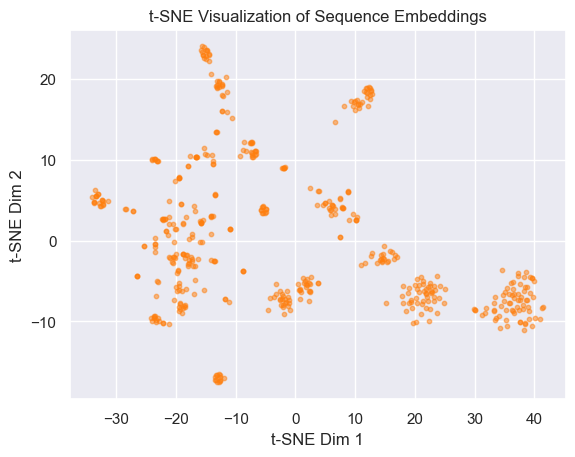

In [65]:
emb = np.loadtxt("embeddings.txt")
print(emb.shape)
# 初始化 t-SNE，设置降维目标为 2 维
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
# 执行降维
embedding_2d = tsne.fit_transform(emb)
print(embedding_2d.shape)
# 绘制降维后的数据
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=10, alpha=0.5, c="#ff7f0e")
plt.title("t-SNE Visualization of Sequence Embeddings")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.show()

In [60]:
# 使用 DBSCAN 进行密度聚类
dbscan = DBSCAN(eps=5, min_samples=10)
labels = dbscan.fit_predict(embedding_2d)

# 检查簇的数量（-1 代表噪声点）
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"DBSCAN 发现的簇数: {num_clusters}")


DBSCAN 发现的簇数: 8


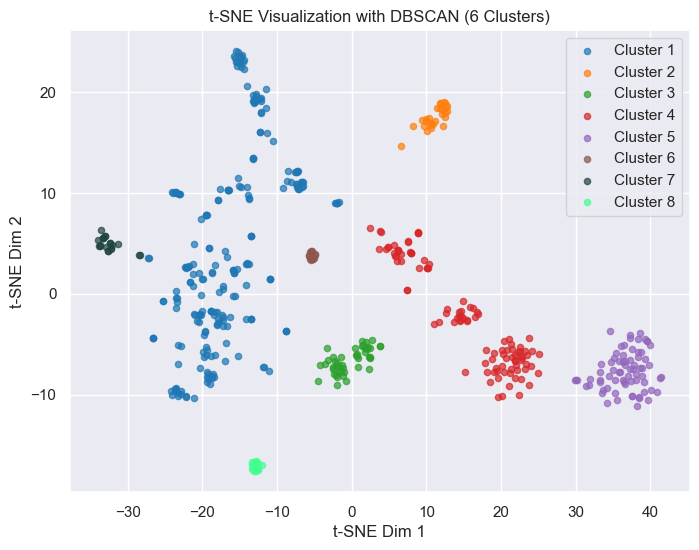

In [61]:
# 定义 6 类颜色
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#214543', '#43ff90']

# 绘制聚类结果
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        embedding_2d[labels == i, 0],  # X轴
        embedding_2d[labels == i, 1],  # Y轴
        s=20,                                  # 点大小
        color=colors[i],                       # 指定颜色
        label=f'Cluster {i+1}',                
        alpha=0.7
    )

plt.title("t-SNE Visualization with DBSCAN (6 Clusters)")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend()
plt.show()